# Naive-Bayes model using title data vectorized with TF-IDF

In [1]:
#import packages

import numpy as np

import pandas as pd 

from sklearn.model_selection import KFold, cross_validate

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, make_scorer, classification_report

import matplotlib as plt

from time import process_time

In [3]:
#import data

%store -r x_title_train_tf
%store -r x_title_test_tf
%store -r y_title_train_tf
%store -r y_title_test_tf

In [4]:
#rename variables for ease of use

x_train = x_title_train_tf
x_test = x_title_test_tf
y_train = y_title_train_tf
y_test = y_title_test_tf

In [5]:
#define model

mnb = MultinomialNB()

In [6]:
#define scoring metrics for cross validation

scorer = {'accuracy': make_scorer(accuracy_score),
          'precision': make_scorer(precision_score),
          'recall': make_scorer(recall_score),
          'f1_score' : make_scorer(f1_score)
          }

In [7]:
#define KFold

k_folds = KFold(n_splits = 5, random_state=42, shuffle=True)

In [8]:
#cross validate on training set to check model stability

cv_scores_tfidf_title_mnb = cross_validate(mnb, x_train, y_train, cv = k_folds, scoring=scorer)

In [9]:
#check cross validation scores

cv_scores_tfidf_title_mnb

{'fit_time': array([0.01097131, 0.00897598, 0.00797796, 0.01199794, 0.00794697]),
 'score_time': array([0.0189786 , 0.01296568, 0.01695466, 0.01396346, 0.01199818]),
 'test_accuracy': array([0.86240546, 0.85874604, 0.85775284, 0.85738685, 0.85311699]),
 'test_precision': array([0.86862802, 0.86269888, 0.859644  , 0.86441664, 0.84465463]),
 'test_recall': array([0.81497677, 0.80883978, 0.81134674, 0.80865542, 0.81656969]),
 'test_f1_score': array([0.84094755, 0.83490163, 0.83479739, 0.83560681, 0.83037475])}

In [10]:
#fit model on the whole training set
start = process_time()

mnb.fit(x_train, y_train)

end=process_time()

In [11]:
#test model on test set

y_pred = mnb.predict(x_test)

In [12]:
#view classification report

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88     10160
           1       0.82      0.86      0.84      7407

    accuracy                           0.86     17567
   macro avg       0.86      0.86      0.86     17567
weighted avg       0.86      0.86      0.86     17567



In [13]:
#view confusion matrix

conf_matrix=confusion_matrix(y_test, y_pred)


[Text(0.5, 1.0, 'Multinomial Naive Bayes model with Title Data (TF-IDF)'),
 Text(0.5, 0, 'Predicted'),
 Text(0, 0.5, 'Actual')]

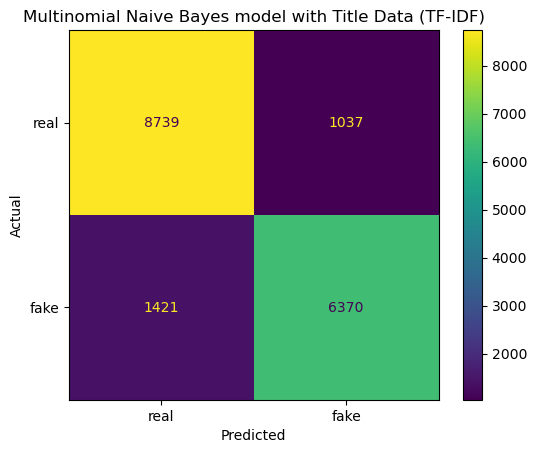

In [14]:
cm_plot = ConfusionMatrixDisplay(conf_matrix, display_labels = ['real', 'fake'])
cm_plot.plot(values_format='')
cm_plot.ax_.set(
                title='Multinomial Naive Bayes model with Title Data (TF-IDF)', 
                xlabel='Predicted', 
                ylabel='Actual')

In [15]:
accuracy=accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
fit_time=end-start

In [16]:
dict = {'data type': 'title',
        'model type':'multinomial Naive-Bayes',
        'vectorize type':'TF-IDF',
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'fit time': fit_time
       }

In [17]:
tfidf_title_mnb=pd.DataFrame.from_dict([dict])

In [18]:
tfidf_title_mnb

,data type,model type,vectorize type,accuracy,precision,recall,f1,fit time
0,title,multinomial Naive-Bayes,TF-IDF,0.860079,0.859997,0.81761,0.838268,0.0


In [19]:
#save results for later use

%store tfidf_title_mnb

Stored 'tfidf_title_mnb' (DataFrame)
